## 1. Open an ECG file into the `ecg` variable
- Download the file: http://denis.mottet.free.fr/M2R/WORK/DATA/ECGu.txt
- We shall put the data into a variable named `ecg`.


### 1.1. Define the path to the ECG file

The path to the file is `data/ECG_hz.txt`, starting from the root of the project.  
However, the present notebook is located in the `notebooks` folder, so we need to go up one level to reach the `data` folder:
  1. go up one level: `../` 
  1. then, reach the `data` folder: `../data/`
  1. then, reach the file: `../data/ECG_hz.txt`

In [22]:
# if the present working directory is the directory of this file, change the path to the project root
import os
if os.getcwd().endswith("notebooks"):
    os.chdir("..")

fNameECG = "data/ECGu.txt"

### 1.2. Read the ecg file

The ECG recording equipment manufacturers instructions specify:

-  
Leads recorded :` I, II, II` 
- 
Sampling frequency `: 1024 ` 
- z
A/D converter gai ` : 520 µV per u`nit

In [24]:
import numpy as np # importation de la bibliothéque numpy 

ecg = np.genfromtxt(fNameECG, delimiter=' ') # espace entre les colonnes du fichier txt

In [26]:
print(ecg) # afficher ecg

[[-275. -119. -119.]
 [-275. -119. -119.]
 [-275. -118. -121.]
 ...
 [  -4.  -83.   21.]
 [  -9.  -88.   31.]
 [ -16.  -96.   33.]]


In [28]:
import pandas as pd

ecg = pd.read_csv(fNameECG, sep=" ", header=None)
print(ecg)

          0      1      2   3
0    -275.0 -119.0 -119.0 NaN
1    -275.0 -119.0 -119.0 NaN
2    -275.0 -118.0 -121.0 NaN
3    -275.0 -121.0 -112.0 NaN
4    -273.0 -120.0 -105.0 NaN
...     ...    ...    ...  ..
6495    3.0  -92.0   28.0 NaN
6496    1.0  -86.0   22.0 NaN
6497   -4.0  -83.0   21.0 NaN
6498   -9.0  -88.0   31.0 NaN
6499  -16.0  -96.0   33.0 NaN

[6500 rows x 4 columns]


In [30]:
ecg.columns = ['I', 'II', 'III','IV'] # Leads recorded

print(ecg)

          I     II    III  IV
0    -275.0 -119.0 -119.0 NaN
1    -275.0 -119.0 -119.0 NaN
2    -275.0 -118.0 -121.0 NaN
3    -275.0 -121.0 -112.0 NaN
4    -273.0 -120.0 -105.0 NaN
...     ...    ...    ...  ..
6495    3.0  -92.0   28.0 NaN
6496    1.0  -86.0   22.0 NaN
6497   -4.0  -83.0   21.0 NaN
6498   -9.0  -88.0   31.0 NaN
6499  -16.0  -96.0   33.0 NaN

[6500 rows x 4 columns]


In [32]:
ecg = ecg.drop('IV', axis=1) # fonction pour supprimer la colonne IV car valeur NaN

In [34]:
print(ecg)

          I     II    III
0    -275.0 -119.0 -119.0
1    -275.0 -119.0 -119.0
2    -275.0 -118.0 -121.0
3    -275.0 -121.0 -112.0
4    -273.0 -120.0 -105.0
...     ...    ...    ...
6495    3.0  -92.0   28.0
6496    1.0  -86.0   22.0
6497   -4.0  -83.0   21.0
6498   -9.0  -88.0   31.0
6499  -16.0  -96.0   33.0

[6500 rows x 3 columns]


In [36]:
ecg_i=ecg[["I"]]

In [38]:
ecg_ii=ecg[["II"]]

In [40]:
ecg_iii=ecg[["III"]]

In [54]:
ecg_I = ecg_i * 520
ecg_II = ecg_ii * 520
ecg_III = ecg_iii * 520

In [49]:
duration = 6500 / 1024  # échantillonné à 1024 (6.34765625 secondes x 1024 s-1 = 6500 données)
print(duration)
time = np.linspace(0, duration, 6500)

6.34765625


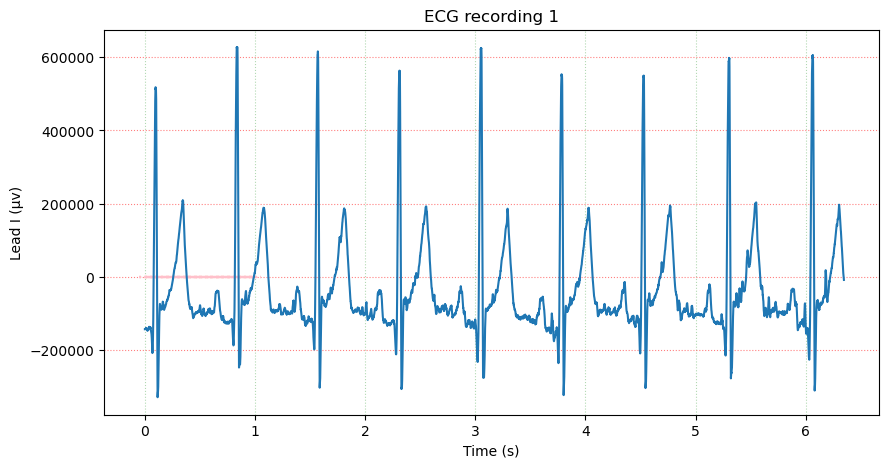

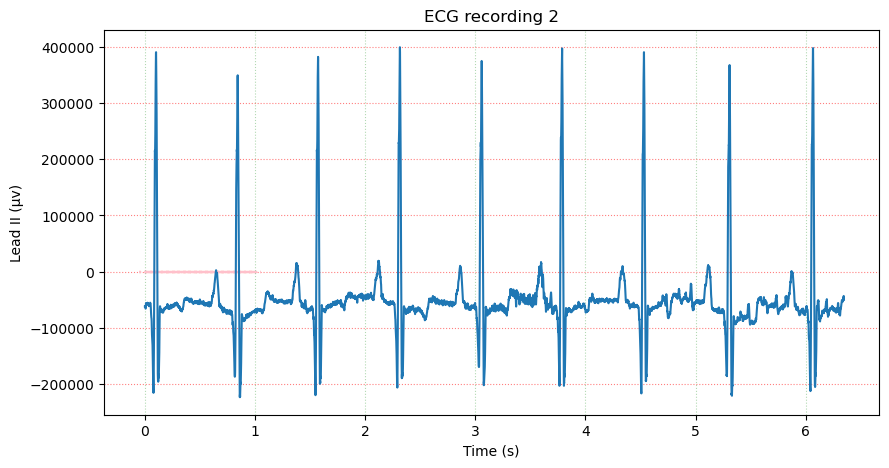

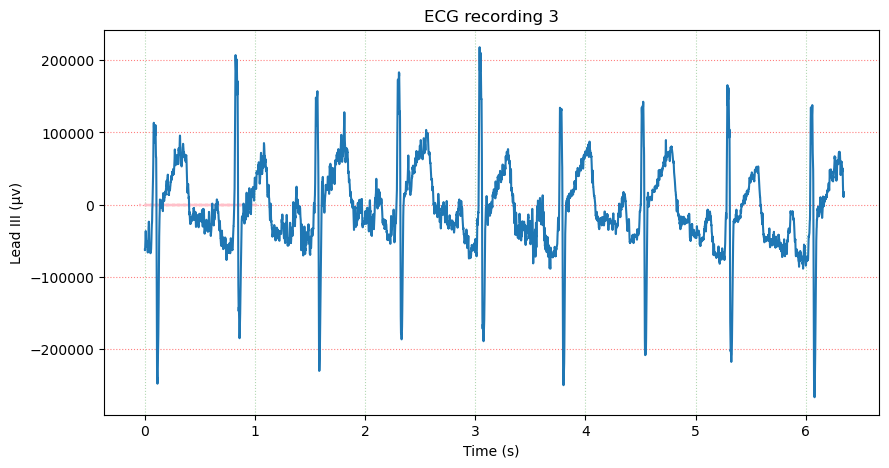

In [56]:
import matplotlib.pyplot as plt

# Première figure
fig, ax = plt.subplots(figsize=(10, 5))

# GRADUATION
# Lignes verticales
ax.grid(True, axis='x', linestyle=':', color='green', alpha=0.3) #  alpha=0.3 donc opacité de 30% 
# Lignes horizontales
ax.grid(True, axis='y', linestyle=':', color='red', alpha=0.5)
# Lignes horizontales additionnelles 
ax.hlines(np.arange(-0.4, 1.0, 0.2),xmin=ax.get_xlim()[0], xmax=ax.get_xlim()[1], colors='pink', linestyles='-', alpha=0.7)
ax.hlines(np.arange(-0.5, 1.0, 0.1),xmin=ax.get_xlim()[0], xmax=ax.get_xlim()[1], colors='pink', linestyles=':', alpha=0.2)

plt.plot(time,ecg_I)
plt.xlabel('Time (s)') # ajout d'un nom d'abscisse
plt.ylabel('Lead I (µv)') # ajout d'un nom d'ordonnée
ax.set_title('ECG recording 1')

# Seconde figure
fig, ax = plt.subplots(figsize=(10, 5))

ax.grid(True, axis='x', linestyle=':', color='green', alpha=0.3) 
ax.grid(True, axis='y', linestyle=':', color='red', alpha=0.5)
ax.hlines(np.arange(-0.4, 1.0, 0.2),xmin=ax.get_xlim()[0], xmax=ax.get_xlim()[1], colors='pink', linestyles='-', alpha=0.7)
ax.hlines(np.arange(-0.5, 1.0, 0.1),xmin=ax.get_xlim()[0], xmax=ax.get_xlim()[1], colors='pink', linestyles=':', alpha=0.2)

plt.plot(time,ecg_II)
plt.xlabel('Time (s)') # ajout d'un nom d'abscisse
plt.ylabel('Lead II (µv)') # ajout d'un nom d'ordonnée
ax.set_title('ECG recording 2')

# Troisième figure
fig, ax = plt.subplots(figsize=(10, 5))

ax.grid(True, axis='x', linestyle=':', color='green', alpha=0.3) 
ax.grid(True, axis='y', linestyle=':', color='red', alpha=0.5)
ax.hlines(np.arange(-0.5, 1.0, 0.2),xmin=ax.get_xlim()[0], xmax=ax.get_xlim()[1], colors='pink', linestyles='-', alpha=0.7)
ax.hlines(np.arange(-0.5, 1.0, 0.1),xmin=ax.get_xlim()[0], xmax=ax.get_xlim()[1], colors='pink', linestyles=':', alpha=0.2)

plt.plot(time,ecg_III)
plt.xlabel('Time (s)') # ajout d'un nom d'abscisse
plt.ylabel('Lead III (µv)') # ajout d'un nom d'ordonnée
ax.set_title('ECG recording 3')

plt.show()